# Reduction de dimension et k-means

Dans ce TP, nous allons mettre en oeuvre des méthodes de réduction de dimension et de clustering sur le jeu de données "hand-written digits".

Le jeu de données se compose d'images de chiffres de 8x8 pixels. L'attribut "images" du jeu de données stocke des tableaux 8x8 de valeurs de niveaux de gris pour chaque image. Nous allons utiliser ces tableaux pour visualiser les 4 premières images. L'attribut "target" stocke le chiffre que chaque image représente et cela est inclus dans le titre des 4 tracés ci-dessous.

Notez que ce jeu de données est plus généralement utilisé pour étudier des méthodes de classification (supervisée).

In [2]:
%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt
import numpy as np

## Importation des données

In [3]:
from sklearn.datasets import load_digits
from sklearn import preprocessing 

In [4]:
digits = load_digits() # les données digits sont disponibles dans les données benchmark de sklearn

In [5]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [6]:
digits['data'].shape

(1797, 64)

> En reprenant les script de cette [page](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html?highlight=load_digits#digits-dataset), afficher l'image d'une donnée de digits.

Text(0.5, 1.0, 'Training')

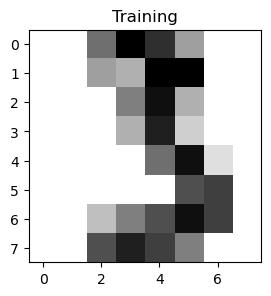

In [7]:
sample_index = 45
plt.figure(figsize=(3, 4))
plt.imshow(digits.images[sample_index], cmap = plt.cm.gray_r, interpolation = 'nearest')
# interpolation="nearest": 这也是一个可选参数，用于指定图像的插值方法。
# 在这里，"nearest"表示使用最近邻插值，即在显示图像时，像素之间的插值使用离它们最近的像素值。
# 这通常用于防止图像失真，但在某些情况下可能导致图像略显锯齿状
plt.title('Training')

> Normaliser les données avec la fonction [`preprocessing.scale()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html). Afficher la dimension du jeu de données.

In [8]:
digits.data_nor = preprocessing.scale(digits.data)
digits.data_nor.shape
print(digits.data_nor)

[[ 0.         -0.33501649 -0.04308102 ... -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  1.56568555  1.6951369
  -0.19600752]
 ...
 [ 0.         -0.33501649 -0.88456568 ... -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...  0.8876023  -0.26113572
  -0.19600752]]


## Réduction de dimension et visualisation 

La fonction [`corrcoef`](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html#numpy.corrcoef) de numpy permet de calculer la matrice de corrélation d'un tableau de données numériques. Attention, pour cette fonction les variables doivent être disposées en lignes dans le tableau de données.

> Calculer et afficher la correlation des données digits. 
> Discuter la correlation affichée.  
> À quoi correspondent les banches de forte correlation ? Et les bandes blanches ?

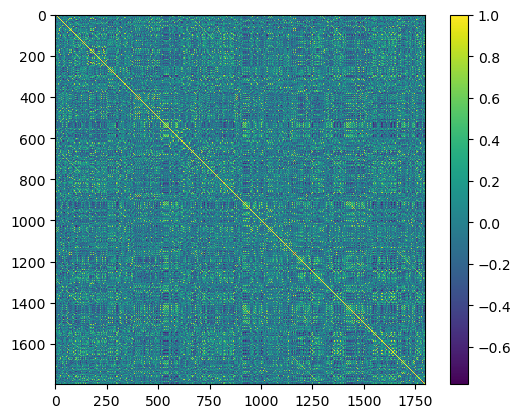

In [9]:
R = np.corrcoef(digits.data_nor.T, rowvar=False)
plt.imshow(R, interpolation = 'none')
plt.colorbar()

 La classe [`PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?highlight=pca#sklearn.decomposition.PCA) de sklearn permet d'effectuer une analyse en composantes principales d'un tableau de données numériques.
 
> Effectuer sur les données digits une reduction de dimension en les projetant sur les 30 premiers axes principaux. 

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=30)
pca.fit(digits.data_nor)
pca_data_reduit = pca.transform(digits.data_nor)
# 查看主成分（特征向量）
components = pca.components_
# print(digits.data_reduit)

# print(components)
print(pca_data_reduit.shape)


(1797, 30)


> En utilisant l'attribut [`explained_variance_ratio_`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?highlight=pca#sklearn.decomposition.PCA) de votre objet de classe `PCA`, calculer et représenter le ratio d'inertie expliqué avec l'attribut.

In [11]:
# 查看每个主成分解释的方差比例
explained_variance_ratio = pca.explained_variance_ratio_

# print(explained_variance_ratio)

 > Représenter les données sur le premier plan factoriel en faisant apparaitre sur le graphique chiffres correspondant (chaque donnée représente un chiffre).

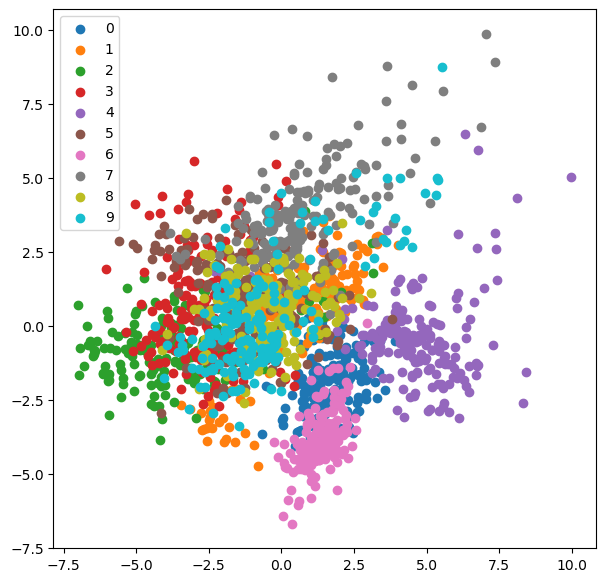

In [12]:

plt.figure(figsize=(7, 7))
for c, i, chiffre in zip(range(0, 10), range(0, 10), range(0, 10)):
    plt.scatter(pca_data_reduit[digits.target == i, 0],
                pca_data_reduit[digits.target == i, 1],
                label = chiffre)

plt.legend()

La classe `PCA` de sklearn n'offre pas la possibilité de tracer le cercle des corrélations. On peut utiliser pour cela utiliser la fonction [`plot_pca_correlation_graph`](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_pca_correlation_graph/#plot_pca_correlation_graph-plot-correlations-between-original-features-and-principal-components) de la librairie [mlxtend](https://github.com/rasbt/mlxtend). 

Cependant, pour cette étude, les variables correspondent à l'un des 64 pixels de l'image, et les possibilités d'interprétation sur la base du cercle des correlations sont donc limitées.

## TSNE

La méthode [`TSNE`](https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py) est une méthode de réduction de dimension **non linéaire**. 

> Vérifier que cette méthode sépare naturellement les 10 classes de chiffres de façon beaucoup plus franche. On pourra directement utiliser la fonction `.fit_transform()` de TSNE.

In [43]:
# digits_tsne
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne_data_reduit_10 = tsne.fit_transform(digits.data_nor)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

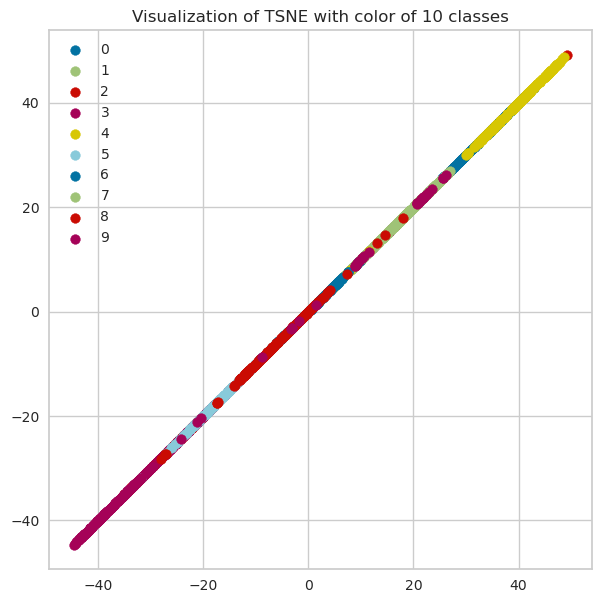

In [49]:

plt.figure(figsize = (7,7))
for c, i, chiffre in zip(range(10), range(10), range(10)):
    plt.scatter(tsne_data_reduit_10[digits.target == i, 0], 
                tsne_data_reduit_10[digits.target == i, 0], 
                label = chiffre)

plt.legend()
plt.title("Visualization of TSNE with color of 10 classes")
plt.show()

Attention cependant, car t-SNE ne préserve ni les distances ni la densité. Il ne préserve que dans une certaine mesure les plus proches voisins. En conséquence, on ne sait jamais vraiment si les clusters visibles après TSNE sont réels ou simplement des artefacts de t-SNE. Voir par exemple cette [discussion](https://stats.stackexchange.com/questions/263539/clustering-on-the-output-of-t-sne).

## Clustering avec k-means

La méthode des k-means est disponible dans le classe [`KMeans`]() de sklearn.

Les données disponibles sont plongées dans $\mathbb{R}^{64}$. Pour rendre plus roboste les procédures statistiques et notamment le clustering, nous allons réduire préalablement réduire la dimension des données.

> Construire le tableau des données sur les 5 premières composantes principales.

In [25]:
# digits_reduced5
pca_5 = PCA(5)
pca_5.fit(digits.data_nor)
digits_reduced5 = pca_5.transform(digits.data_nor)

Chaque donnée disponible correspond à une image d'un des 10 chiffres. Cependant, il est n'est pas du évident qu'un algorithme de clustering produira des clusters en adéquation avec la classification par chiffre. En fait, en particulier si les données sont complexes, plusieurs clusterings peuvent souvent être proposés pour un même jeu de données.

On ne connait pas a priori le nombre de clusters à identifier (voir plus loin). Essayons malgré tout avec 10 classes (correspondant potententiellement aux 10 chiffres possibles). 


> Effectuer un clustering à 10 classes sur les données digits (normalisées).  
> Représenter les données sur le premier plan factoriel de l'ACP, puis avec une projection TSNE.

In [34]:
from sklearn.cluster import KMeans
monkm = KMeans(n_clusters = 10)
monkm.fit(digits.data_nor)
km_pred = monkm.predict(digits.data_nor)
centers = monkm.cluster_centers_ 
monkm.labels_

/root/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 1, 1, ..., 1, 7, 7], dtype=int32)

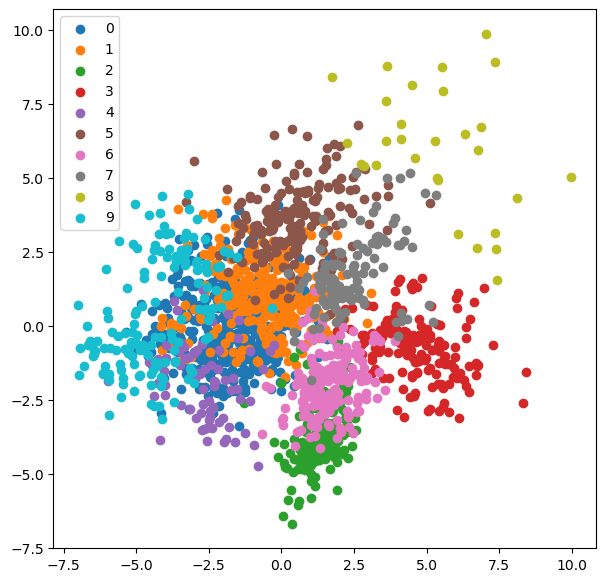

In [27]:
plt.figure(figsize=(7, 7))
for c, i, clus in zip(range(0,10), range(0,10), range(0,10)):
    plt.scatter(digits_reduced5[monkm.labels_==i,0],
                digits_reduced5[monkm.labels_==i,1],
                label= clus
               )
plt.legend()

In [50]:
# TSNE
digits_tsne = tsne_data_reduit_10

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

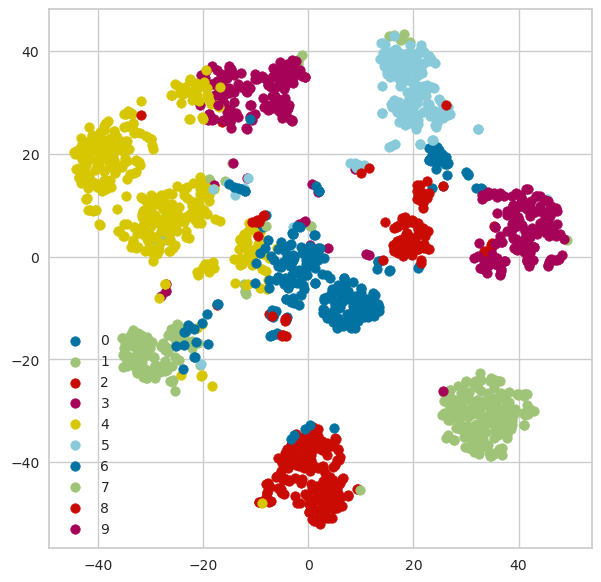

In [51]:
plt.figure(figsize=(7, 7))
for c, i, clus in zip(range(0,10), range(0,10), range(0,10)):
    plt.scatter(digits_tsne[monkm.labels_==i,0],
                digits_tsne[monkm.labels_==i,1],
                label= clus
               )
plt.legend()

#### Matrice de confusion

En utilisant les fonctions [`confusion_matrix`](http://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix/) et [`plot_confusion_matrix`]() de la librairie `mlxtend`, étudier le lien éventuel entre le clustering obtenu et la classification en chiffre.

<Figure size 300x300 with 0 Axes>

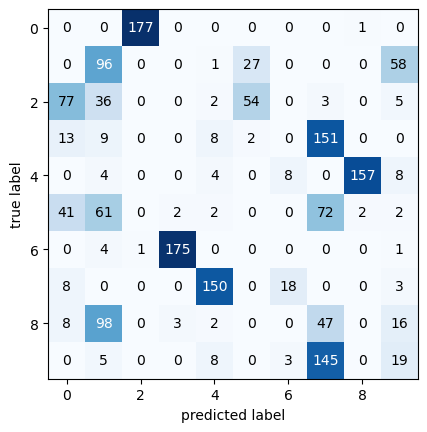

In [36]:
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.evaluate import confusion_matrix
plt.figure(figsize=(3,3))
# KMeans
cm = confusion_matrix(y_target = digits.target, y_predicted = km_pred)
fig, ax = plot_confusion_matrix(conf_mat = cm)
plt.show()

#### Adjusted Random Index

L'[Adjusted Random Index](https://scikit-learn.org/stable/modules/clustering.html#rand-index) est un coefficient qui permet de comparer deux clusterings (ou partitions) d'un même jeu de données.

> Calculer l'ARI entre le clustering k-means obtenu et la classification en chiffre.

In [35]:
from sklearn import metrics

# KMeans
ari_k = metrics.adjusted_rand_score(labels_true=digits.target, labels_pred=km_pred)


L'ARI n'est pas très élevé mais les deux partitions ont tout de même des similitudes. 

Comme déjà dit plus haut, l'objectif ici n'est pas de retrouver la même partition comme ce serait le cas en classification supervisée. On ne fait que comparer les deux partitions et noter qu'elles ont des points communs. On note simplement que les observations peuvent être naturellement regroupées en classes qui sont en rapport avec le chiffre de l'image.

#### Critère de silhouette

Le coefficient de silhouette est un indicateur qui permet de mesurer si le clustering a une bonne structure, et il peut être utilisé pour sélectionner le nombre de classes. Vous pouvez par exemple lire [ce petit tutoriel](http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient).

Pour visualiser la silhouette, le plus simple est d'utiliser la fonction [`SilhouetteVisualizer`](https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html) de la librairie `yellowbrick`.

> Afficher la sihouette pour le clustering k-means obtenu précédemment.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

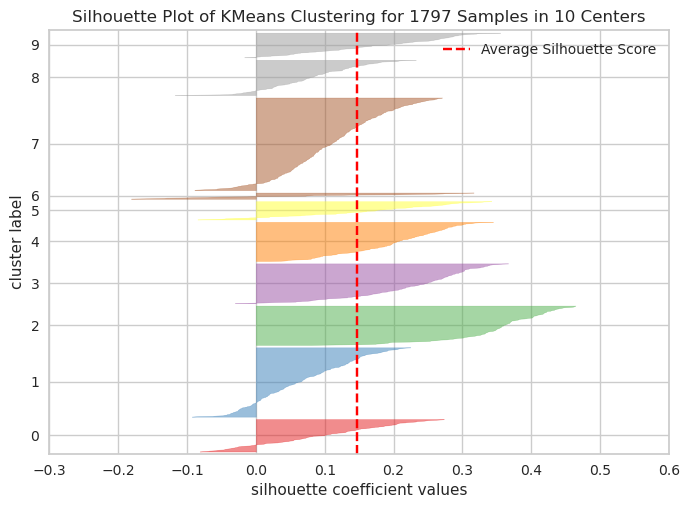

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1797 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [37]:
from yellowbrick.cluster import SilhouetteVisualizer
visualizer = SilhouetteVisualizer(monkm, color = 'yellowbrick')
visualizer.fit(digits.data_nor)

visualizer.show()

La fonction [`silhouette_samples`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html) permet de calculer le coefficient de silhouette pour chaque donnée.

> Identifier une image dont le coefficient de silhouette est très négatif et faites un retour aux données pour essayer de comprendre apparait comme mal classé dans son cluster.

In [38]:
metrics.silhouette_samples(X = digits.data_nor, labels = monkm.labels_)


array([ 0.41944998,  0.08409168, -0.02661362, ...,  0.0932993 ,
       -0.04844342,  0.00964239])

#### Choix du nombre de cluster par critère de silhouette 

> Déterminer le nombre de cluster optimal pour k-means pour le critère de silhouette. On pourra pour cela utiliser la fonction [`KElbowVisualizer`](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html) de la librairie yellowbrick.

/root/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/root/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/root/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/root/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

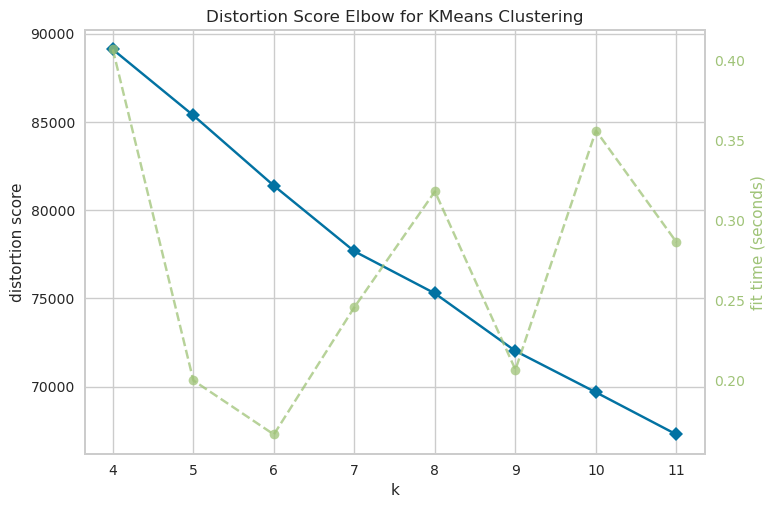

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
from yellowbrick.cluster import KElbowVisualizer
visualizer_s = KElbowVisualizer(monkm, k = (4, 12))

visualizer_s.fit(digits.data_nor)
visualizer_s.show()